Stephanie Smith
Matplotlib HW
Due 1/18/2020

## Observations and Insights

## Dependencies and starter code

In [143]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# Merge our two data frames together
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [144]:
#Rename Tumor Volume (mm3) column for easier reference
combined_df = combined_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume"})

#Create list of functions to calculate tumor volume summary data
mystats = ['mean','median','var','std','sem']

#Create summary df showing mean, median, variance, standard dev, and SEM of Tumor Volume for each drug. Set Drug Regimen as index
summary_stats=combined_df.copy()
summary_stats=summary_stats.groupby(['Drug Regimen'],as_index=True)[['Tumor Volume']].agg(mystats)
summary_stats=summary_stats.rename(columns={"mean":"Total Mean Vol", "median":"Total Median Vol","var":"Total Variance",
                                            "std":"Standard Deviation","sem":"SEM of Tumor Vol"})
summary_stats

Tumor Volume                                  \
             Total Mean Vol Total Median Vol Total Variance   
Drug Regimen                                                  
Capomulin         40.675741        41.557809      24.947764   
Ceftamin          52.591172        51.776157      39.290177   
Infubinol         52.884795        51.820584      43.128684   
Ketapril          55.235638        53.698743      68.553577   
Naftisol          54.331565        52.509285      66.173479   
Placebo           54.033581        52.288934      61.168083   
Propriva          52.322552        50.854632      42.351070   
Ramicane          40.216745        40.673236      23.486704   
Stelasyn          54.233149        52.431737      59.450562   
Zoniferol         53.236507        51.818479      48.533355   

                                                  
             Standard Deviation SEM of Tumor Vol  
Drug Regimen                                      
Capomulin              4.994774         0.329346  
Ceftamin               6.268188         0.469821  
Infubinol              6.567243         0.492236  
Ketapril               8.279709         0.603860  
Naftisol               8.134708         0.596466  
Placebo                7.821003         0.581331  
Propriva               6.507770         0.512884  
Ramicane               4.846308         0.320955  
Stelasyn               7.710419         0.573111  
Zoniferol              6.966589         0.516398

In [145]:
data_counts=combined_df["Drug Regimen"].value_counts()
data_counts=pd.DataFrame(data_counts)
data_counts = data_counts.rename(columns={"Drug Regimen":"Data Points"})
data_counts


,Data Points
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,161


## Bar plots

<IPython.core.display.Javascript object>


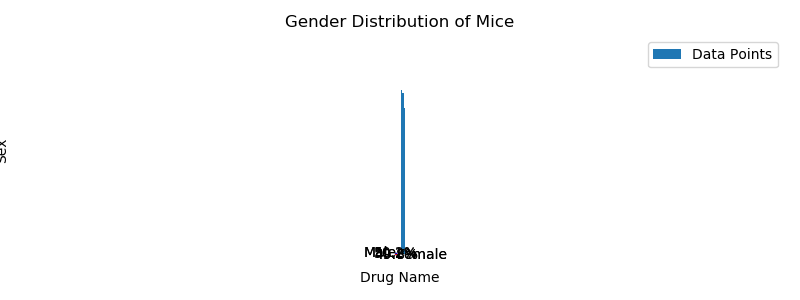

In [146]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Use DataFrame.plot() in order to create a bar chart of the data (use grouped df "data_counts")
data_counts.plot(kind="bar", figsize=(8,3))

# Set a title for the chart
plt.title("Trials per Drug")
plt.xlabel("Drug Name")
plt.ylabel("Number of Trials")
plt.show()
plt.tight_layout()

#*****Stop interaction on graph before proceeding

<IPython.core.display.Javascript object>


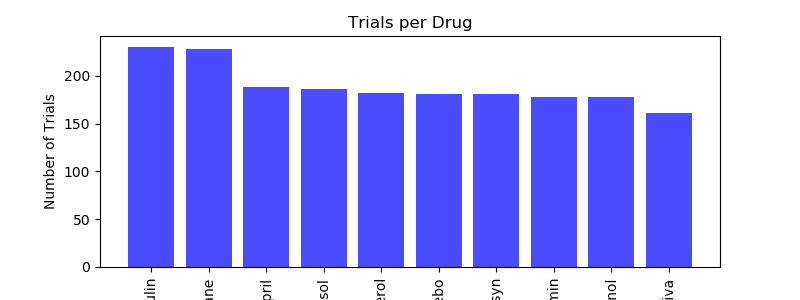

Text(0, 0.5, 'Number of Trials')

In [48]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_pts = data_counts["Data Points"]
drug_type = list(data_counts.index.values)
drug_type
# Set x axis and tick locations
x_axis = np.arange(0,len(drug_type))
x_axis
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,3))
plt.bar(x_axis, data_pts, color='b', alpha=0.7, align="center")
plt.xticks(tick_locations, drug_type, rotation="vertical")
plt.title("Trials per Drug")
plt.xlabel("Drug Name")
plt.ylabel("Number of Trials")

#*****Stop interaction on graph before proceeding

## Pie plots

In [147]:
#create df with gender and count of gender
gender_counts=pie_df["Sex"].value_counts()
gender_df = gender_counts.to_frame().reset_index()
gender_df = gender_df.rename(columns={"index":"Gender","Sex":"Gender Count"})
type(gender_df)
gender_df

,Gender,Gender Count
0,Male,125
1,Female,124


In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Use DataFrame.plot() in order to create a pie chart of the data
gender = gender_df['Gender'].unique()
gender=gender.tolist()
gender
#gender_df.plot.pie(labels=gender, subplots=True, colors=['b', 'g'], figsize=(5,5))

gender_counts.plot.pie(labels=gender, colors=['b', 'r'], subplots=True, autopct='%1.1f%%', fontsize=10, figsize=(4, 4))
# Set a title for the chart
plt.title("Gender Distribution of Mice")
plt.show()
plt.tight_layout()

#**note - this is creating a pie chart using pandas, but is really using series.plot.pie instead of DataFrame.plot...
#I was struggling to get all of the formatting using the DataFrame.plot, but the basic format would be 
#gender_df.plot(kind-"pie", y=...etc)

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The values of each section of the pie chart
gender_count = gender_counts

# Labels for the sections of our pie chart
sex = gender

# The colors of each section of the pie chart
colors = ["blue", "red"]

# Tells matplotlib to seperate one section from the rest
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Gender Distribution of Mice")
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../GenderPiesMat.png")
plt.show()

## Quartiles, outliers and boxplots

In [171]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  

#get latest and greatest timepoint for each mouse
max_time=combined_df.copy()
max_time=max_time.groupby(['Mouse ID'],as_index=True)[['Timepoint']].max()
#max_time

#Merge with original df, only on final timpoint
max_time = pd.merge(max_time, combined_df, on=['Mouse ID','Timepoint'], how='inner')
max_time

#use loc to get tumor vol for each of 4 drugs (Capomlin, Ramicane, Infubinol, Ceftamin)
four_drugs = max_time.loc[(max_time["Drug Regimen"]=="Capomulin")|
                          (max_time["Drug Regimen"]=="Ramicane")|
                          (max_time["Drug Regimen"]=="Infubinol")|
                          (max_time["Drug Regimen"]=="Ceftamin"),:]
four_drugs



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [172]:
#four_drugs.to_csv("../fileOne.csv", index=False, header=True)
#max_time.to_csv("../fileTwo.csv", index=False, header=True)

<IPython.core.display.Javascript object>


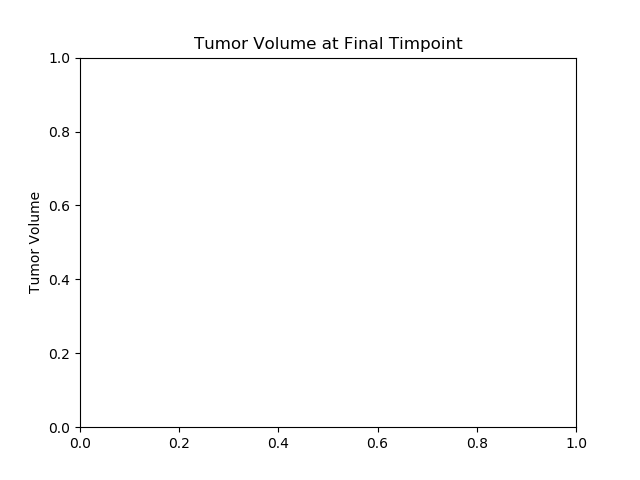

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [175]:
#set variable for tumor volume to use below
#four_drugs['Tumor Volume']
tumor_vol = four_drugs[["Tumor Volume","Drug Regimen"]]
tumor_vol

#drug_type = four_drugs["Drug Regimen"].unique()
#drug_type
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Final Timpoint')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol)
plt.show()

#plt.boxplot ([x1, x2, x3])

In [122]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


<IPython.core.display.Javascript object>


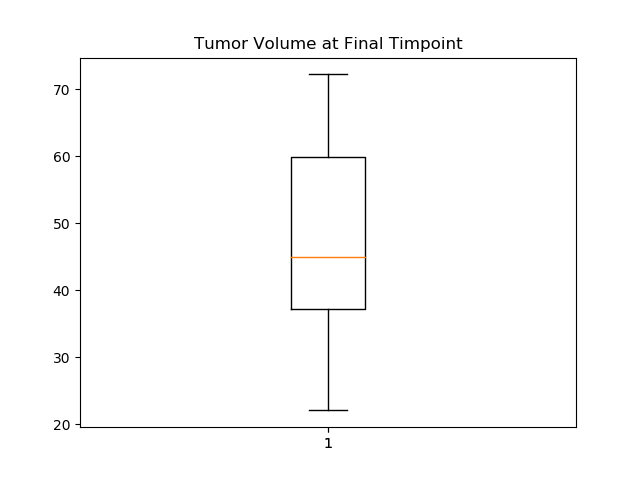

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Final Timpoint')
ax1.boxplot(tumor_vol)
plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen